In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
#matplotlib iline

In [36]:
data = {
    "category": ["games", "productivity", "books", "games", "games"],
    "reviews numbers": [432, 178, 301, 98, 235],
    "instalations numbers": [1289, 1623, 1045, 993, 1262],
    "size": [275, 187, 298, np.nan, 201],
    "price": [0, -0.3, 0.73, 0, 0.91],
    "days since last update": [92, 68, 74, 79, 103],
    "rating": [2.15, 2.31, 1.52, 1.67, 2.97],
}

df = pd.DataFrame(data)
print(df.head())

       category  reviews numbers  instalations numbers   size  price  \
0         games              432                  1289  275.0   0.00   
1  productivity              178                  1623  187.0  -0.30   
2         books              301                  1045  298.0   0.73   
3         games               98                   993    NaN   0.00   
4         games              235                  1262  201.0   0.91   

   days since last update  rating  
0                      92    2.15  
1                      68    2.31  
2                      74    1.52  
3                      79    1.67  
4                     103    2.97  


In [37]:
missing_values = df.isnull().sum()
print(f"Missing values in each column: \n{missing_values}")

Missing values in each column: 
category                  0
reviews numbers           0
instalations numbers      0
size                      1
price                     0
days since last update    0
rating                    0
dtype: int64


In [38]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

Numerical columns: ['reviews numbers', 'instalations numbers', 'size', 'price', 'days since last update', 'rating']


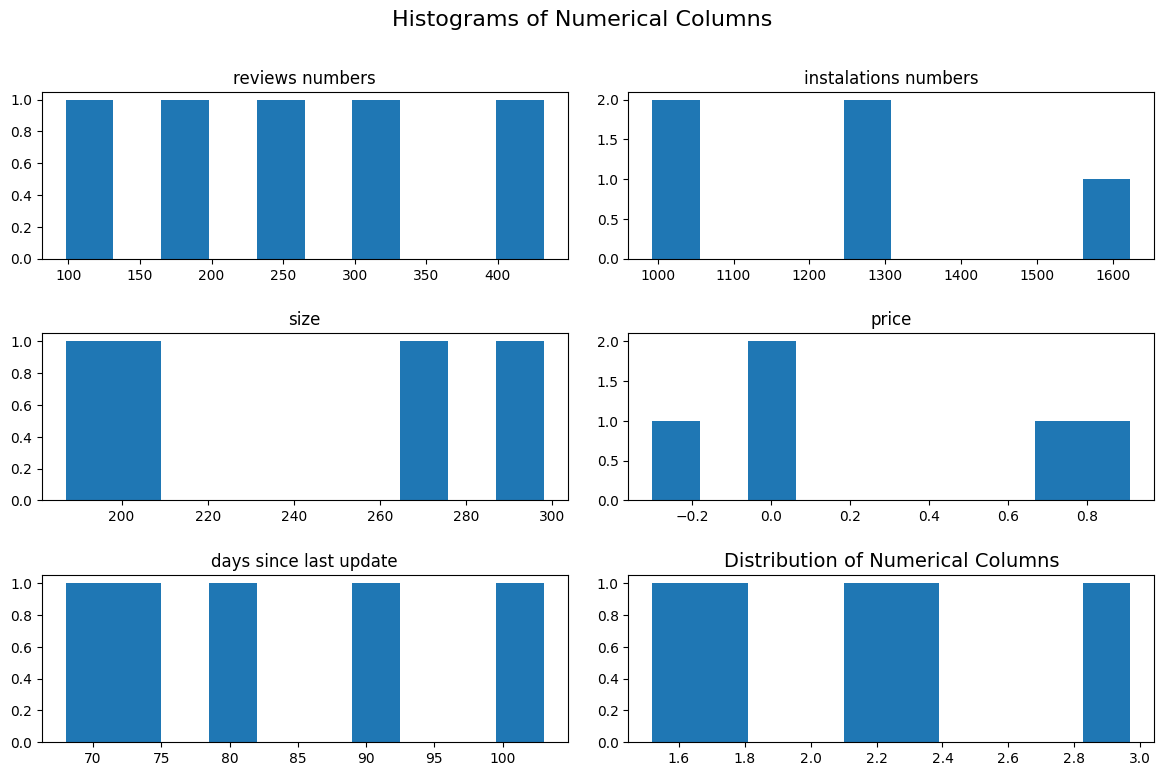

In [39]:
plthist = df.hist(column=numerical_cols, bins=10, figsize=(12, 8), grid=False)
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.title("Distribution of Numerical Columns", fontsize=14)
plt.tight_layout(h_pad=2, pad=2)

In [40]:
# generate descring statistics about the numerical columns of the dataframe
describing_statics = df.describe()
print(f"Describing statistics: \n{describing_statics}")

Describing statistics: 
       reviews numbers  instalations numbers        size     price  \
count          5.00000              5.000000    4.000000  5.000000   
mean         248.80000           1242.400000  240.250000  0.268000   
std          126.71898            249.288588   54.524459  0.522465   
min           98.00000            993.000000  187.000000 -0.300000   
25%          178.00000           1045.000000  197.500000  0.000000   
50%          235.00000           1262.000000  238.000000  0.000000   
75%          301.00000           1289.000000  280.750000  0.730000   
max          432.00000           1623.000000  298.000000  0.910000   

       days since last update    rating  
count                5.000000  5.000000  
mean                83.200000  2.124000  
std                 14.166863  0.574874  
min                 68.000000  1.520000  
25%                 74.000000  1.670000  
50%                 79.000000  2.150000  
75%                 92.000000  2.310000  
max      

In [41]:
#  third step we gonna verify if exists not valid values in the numerical columns
verify = pd.to_numeric(df['rating'], errors='coerce')
print(f"Verify if exists not valid values in the numerical columns: \n{verify}\n\n")

# now we gonna check if there are missing values in the numerical columns
missing_values = df.isnull().sum()
print(f"Missing values in the numerical columns: \n{missing_values}")

Verify if exists not valid values in the numerical columns: 
0    2.15
1    2.31
2    1.52
3    1.67
4    2.97
Name: rating, dtype: float64


Missing values in the numerical columns: 
category                  0
reviews numbers           0
instalations numbers      0
size                      1
price                     0
days since last update    0
rating                    0
dtype: int64


In [42]:

# looking at the dataframe where the values of the coluns days since last update and rating are greater or equal to 0
df = df[(df['days since last update'] >= 0) & (df['rating'] >= 0)]
print(f"Dataframe after removing negative values: \n{df}\n\n")

print(f"Shape = {df.shape}")

Dataframe after removing negative values: 
       category  reviews numbers  instalations numbers   size  price  \
0         games              432                  1289  275.0   0.00   
1  productivity              178                  1623  187.0  -0.30   
2         books              301                  1045  298.0   0.73   
3         games               98                   993    NaN   0.00   
4         games              235                  1262  201.0   0.91   

   days since last update  rating  
0                      92    2.15  
1                      68    2.31  
2                      74    1.52  
3                      79    1.67  
4                     103    2.97  


Shape = (5, 7)


In [43]:
# we gonna select the all the columns from the dataframe except the rating, and assign its features to a variable X
X = df.drop(columns=['rating'])

# we gonna select the rating column from the dataframe and assign its target to a variable y    
y = df['rating']

# we gonna split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}") 
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (4, 6)
X_test shape = (1, 6)
y_train shape = (4,)
y_test shape = (1,)


In [44]:
# sixth step now we gonna check if exists a strong correlation between the features and the target
# we need to remove the column category from the dataframe
X_train = X_train.drop(columns=['category'])

# calculate the correlation matrix
correlation_matrix = X_train.corr()
# print the correlation matrix
print(f"Correlation matrix: \n{correlation_matrix}\n\n")

Correlation matrix: 
                        reviews numbers  instalations numbers      size  \
reviews numbers                1.000000              0.195047  0.997761   
instalations numbers           0.195047              1.000000 -0.568756   
size                           0.997761             -0.568756  1.000000   
price                          0.074290             -0.311379 -0.134249   
days since last update         0.486628             -0.372237  0.352111   

                           price  days since last update  
reviews numbers         0.074290                0.486628  
instalations numbers   -0.311379               -0.372237  
size                   -0.134249                0.352111  
price                   1.000000                0.882999  
days since last update  0.882999                1.000000  




In [ ]:
# seventh step, create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
plt.title("Correlation Heatmap", fontsize=16)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

In [ ]:
# eitghf step creating five scatter plot to visualize  the correlation between the column rating e others numericals columns
# 
# 
# scatter plot between rating and reviews numbers
plt.figure(figsize=(10, 6)) 
plt.scatter(df['reviews numbers'], df['rating'], color='blue')
plt.title('Scatter Plot: Reviews Numbers vs Rating', fontsize=16)
plt.xlabel('Reviews Numbers', fontsize=14)
plt.ylabel('Rating', fontsize=14)   
plt.grid()
plt.show()  

In [53]:
# ninth step pre processing data in the column x_train and exchange the null values for the mean of the column
X_train['size'].fillna(X_train['size'].mean(), inplace=True)

category_col = df['category']

imputer = SimpleImputer(strategy='mean')

tf_num = imputer.fit_transform(X_train[['reviews numbers', 'instalations numbers', 'size', 'price', 'days since last update']])

scaler = StandardScaler()
tf_num = scaler.fit_transform(tf_num)

ohe = OneHotEncoder()
tf_cat = ohe.fit_transform(category_col.values.reshape(-1, 1))
X_train = np.concatenate([tf_num, tf_cat], axis=1)


C:\Users\SamuelCaetanoPacheco\AppData\Local\Temp\ipykernel_14532\46425470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['size'].fillna(X_train['size'].mean(), inplace=True)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)